### Desafío 1: Preparar el ambiente de trabajo
* Importe los módulos numpy , pandas , matplotlib , seaborn , glob y os siguiendo las
buenas prácticas. Los últimos dos módulos permitirán realizar la importación de múltiples
archivos dentro de la carpeta dump .

* Para ello genere un objeto que guarde en una lista todos los archivos alojados en dump
utilizando glob.glob y os.getcwd() para extraer las rutas absolutas. Posteriormente
genere un objeto pd.DataFrame que contenga todos los csv.

* Asegúrese de eliminar la columna Unnamed: 0 que se genera por defecto.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import glob, os

import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

plt.style.use('seaborn')

In [24]:
file_list = glob.glob(os.getcwd() + '/dump/*.csv')

append_csv = []

for f in file_list:
    #abrir en pandas y concatenar
    append_csv.append(pd.read_csv(f, index_col=None, header=0).drop(columns='Unnamed: 0'))
    
#Concatenamos todos los CSV
df_lyrics = pd.concat(append_csv)
df_lyrics.columns = ['Artist', 'Genre', 'Song', 'Lyrics']

In [3]:
df_lyrics.head()

,Artist,Genre,Song,Lyrics
0,Anthrax,metal,Deathrider,"Riding hard, high in the saddle \n Winged stee..."
1,Anthrax,metal,Metal Thrashing Mad,Racing down the road \n In a street machine of...
2,Anthrax,metal,I'm Eighteen,Lines form on my face and hands \n Lines form ...
3,Anthrax,metal,Panic,Move it to the front \n Reaching for the light...
4,Anthrax,metal,Subjugator,Out in the streets \n We're fighting tonight \...


### Desafío 2: Descripción de los datos
* Utilizando el objeto creado en el Ejercicio 1, genere dos gráficos de barras que resuman la
siguiente información:

 * La cantidad de canciones registradas por cada artista, ordenado de mayor a menor.
 * La cantidad de canciones registradas en cada género, ordenados de mayor a menor.

* Comente sobre las principales tendencias.

Text(0.5, 1.0, 'Ordenado por Artista')

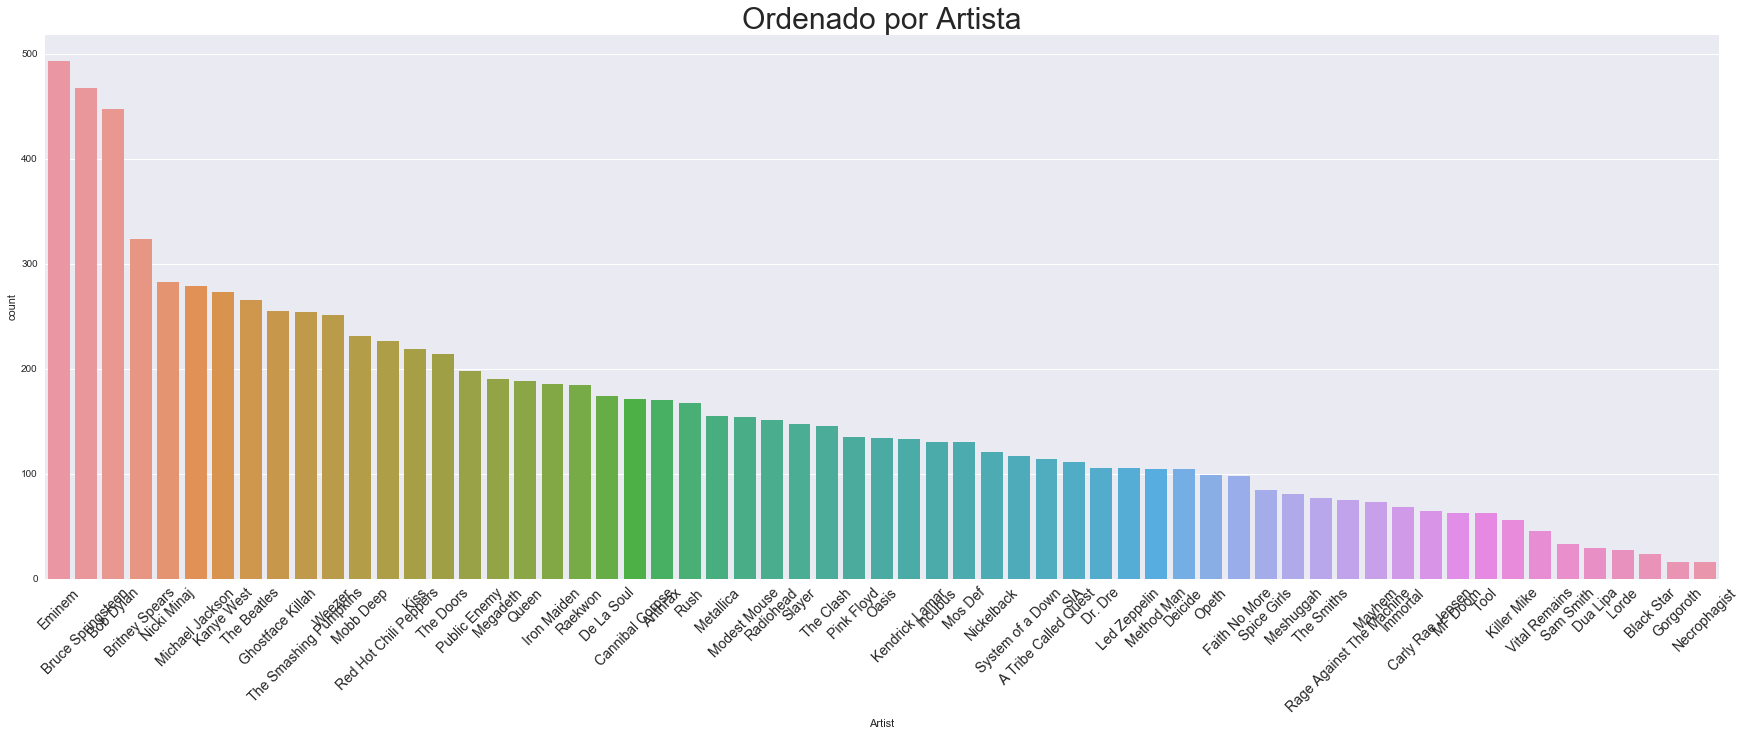

In [20]:
plt.figure(figsize=(30, 10))
sns.countplot(x='Artist', data=df_lyrics, order=df_lyrics['Artist'].value_counts().index)
plt.xticks(rotation=45, size=14)
plt.title('Ordenado por Artista', size=30)

Text(0.5, 1.0, 'Ordenado por Género')

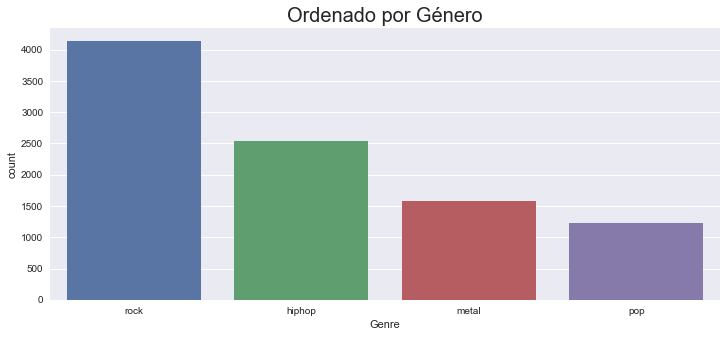

In [22]:
plt.figure(figsize=(12, 5))
sns.countplot(x='Genre', data=df_lyrics, order=df_lyrics['Genre'].value_counts().index)
plt.title('Ordenado por Género', size=20)

In [6]:
df_lyrics.Genre.value_counts('%')

rock      0.436295
hiphop    0.267151
metal     0.166719
pop       0.129835
Name: Genre, dtype: float64

El género de `Rock` es el dominante en el dataset con un 43%, seguido del `Hip Hop` de un 26% y el resto está comprendido entre`Metal & Pop`. También se puede decir que un poco más del 60% escuchan `Rock & Hiphop`

### Desafío 3: Matriz de ocurrencias
* Importe la clase CountVectorizer dentro de los módulos feature_extraction.text de
la librería sklearn . Lea la documentación asociada a ésta. ¿Cuál es el objetivo de esta
clase?

* Aplique la clase para extraer las 100 palabras más repetidas en toda la base de datos.
* Genere una función que replique el procedimiento para cada uno de los géneros.
* Comente sobre las principales características de cada género en cuanto a sus palabras.

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

In [25]:
cv = CountVectorizer(stop_words='english')
cv_fit = cv.fit_transform(df_lyrics['Lyrics'])

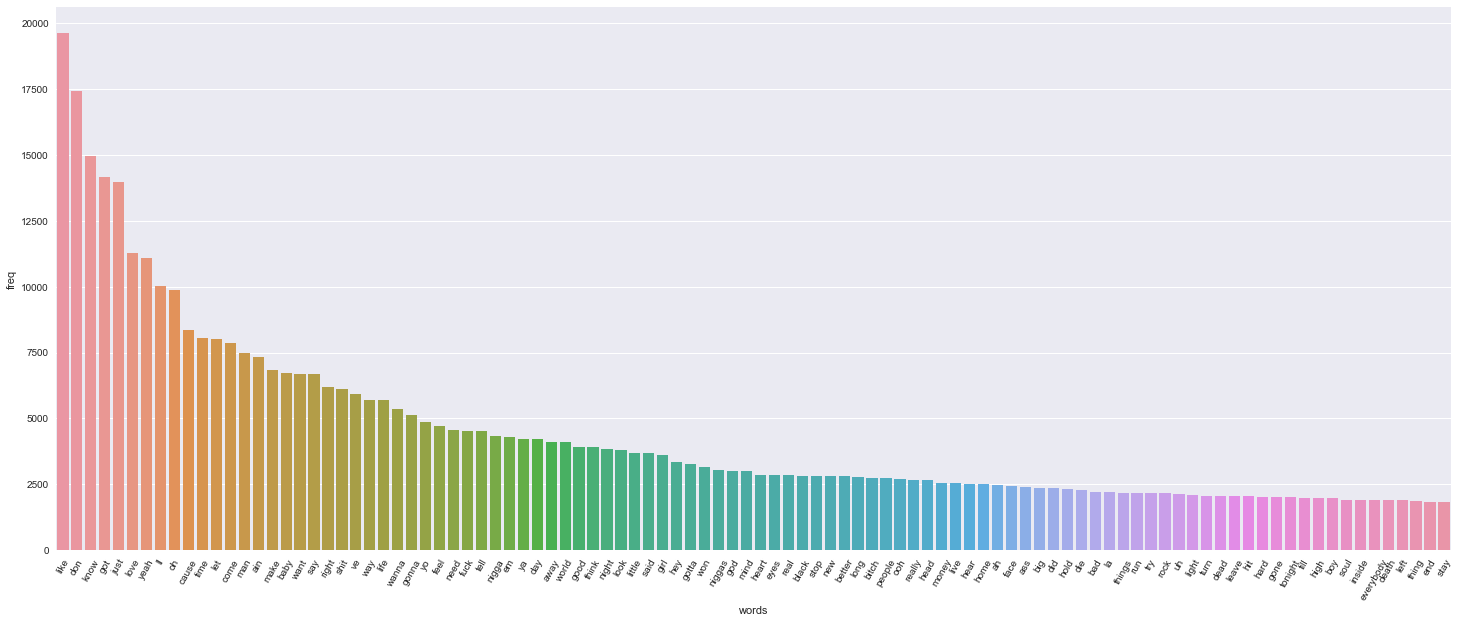

In [26]:
words = cv.get_feature_names()
word_freq = cv_fit.toarray().sum(axis=0)
words_df = pd.DataFrame({'words': words, 'freq': word_freq})

plt.figure(figsize=(25,10))
plt.xticks(rotation=60)
words_df.sort_values(by='freq', ascending=False, inplace=True)
sns.barplot(x='words', y='freq', data=words_df.head(100))

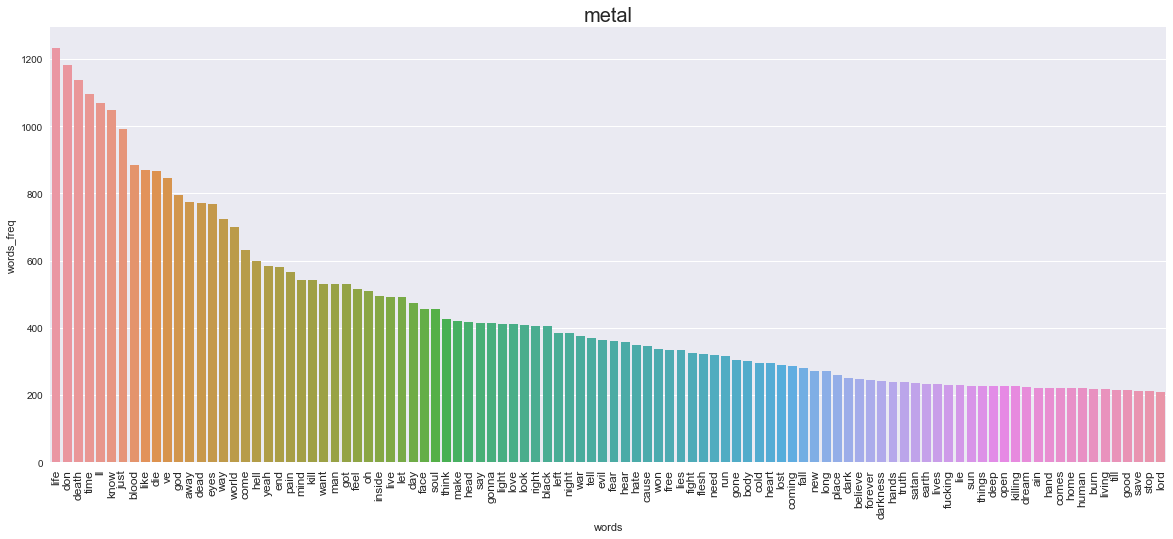

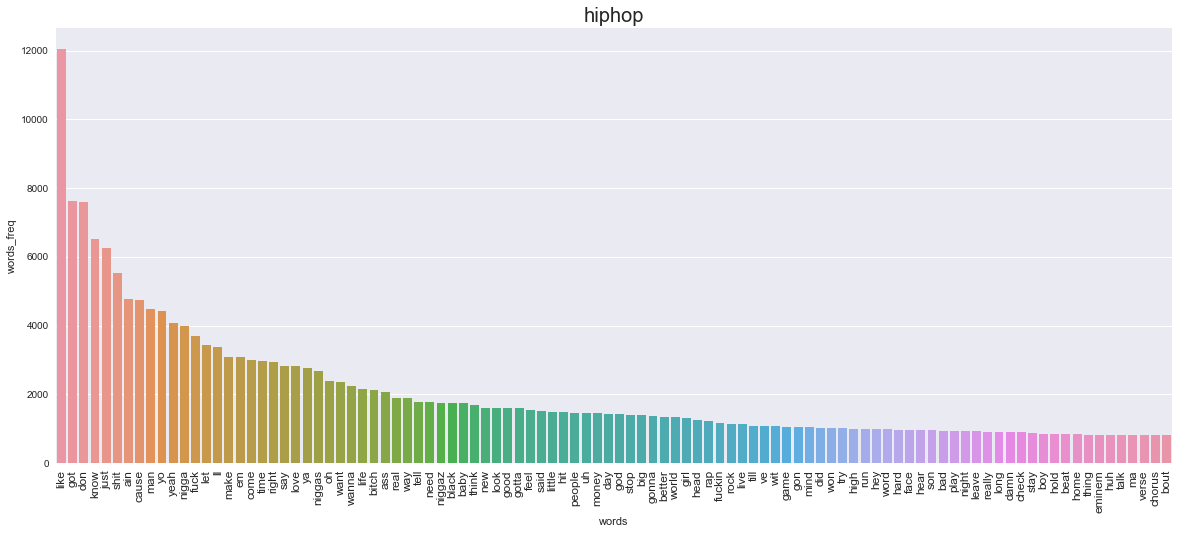

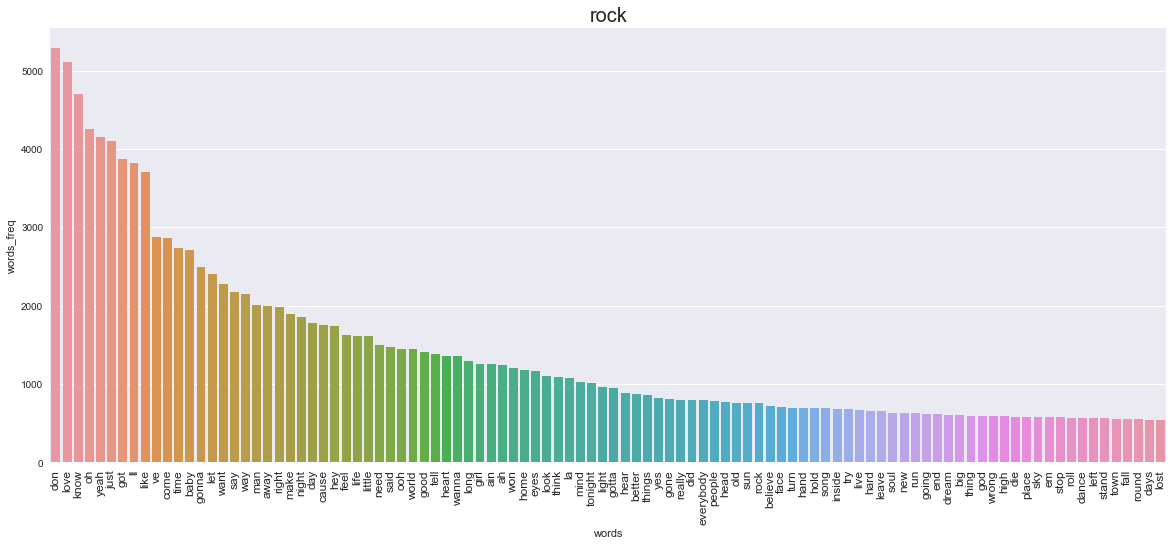

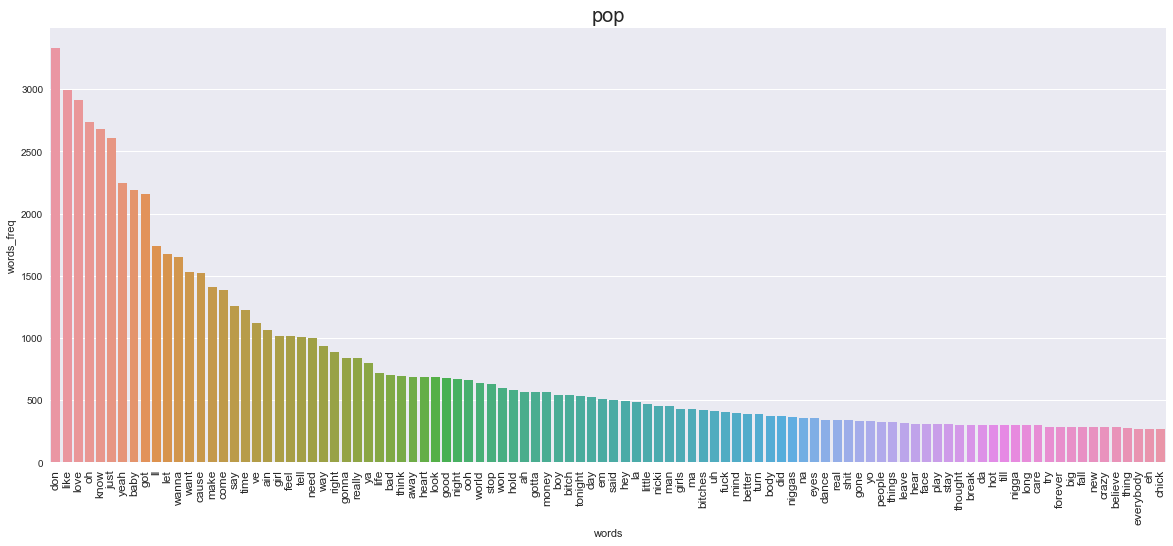

In [41]:
#Aplicando función para cada uno de los géneros

for n in df_lyrics['Genre'].unique():
    df_genre = df_lyrics[df_lyrics['Genre'] == n]['Lyrics']
    cv_fit = cv.fit_transform(df_genre)
    words = cv.get_feature_names()
    word_freq = cv_fit.toarray().sum(axis=0)
    
    #genero mi dataframe
    words_df = pd.DataFrame({'words': words, 'words_freq': word_freq})
    #Gráfico
    plt.figure(figsize=(20,8))
    words_df.sort_values(by='words_freq', ascending=False, inplace=True)
    sns.barplot(x='words', y='words_freq', data=words_df.head(100))
    plt.title(n, size=20)
    plt.xticks(rotation=90, size=12)

Los dataframes de __Pop & Rock__ son muy similares, donde contienen palabras como __Love, Like, Won, Got, entre otras__ en primeras posiciones, al contrario de lo que sucede con los dataframes de __Metal & Hiphop__ que son diferentes entre sí y más si los comparo con el resto.

### Desafío 4: Entrenamiento del Modelo
* Importe MultinomialNB , train_test_split , Pipeline , confusion_matrix y
classification_report .
* Genere las muestras de entrenamiento y validación reservando un 40% para validación y
declarando una semilla pseudoaleatoria.
* Monte el modelo dentro de un Pipeline , donde el primer paso es implementar
CountVectorizer y el segundo sea ejecutar el clasificador MultinomialNB .
* A continuación se les presenta una lista de letras, ¿cuáles serían las predicciones
correspondientes?
* Genere una predicción implementando la muestra de validación y contraste las predicciones
del modelo con las etiquetas verdaderas. Reporte las principales métricas

In [42]:
df_lyrics.columns

Index(['Artist', 'Genre', 'Song', 'Lyrics'], dtype='object')

In [43]:
X = df_lyrics['Lyrics']
Y = df_lyrics['Genre']

#Se divide en la matriz de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.40, random_state=1238)

text_classifier = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('classifier', MultinomialNB())
]
)
text_classifier.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [44]:
text_predict = ['I got a place in the underworld', # Brody Dalle -Underworld
                  'As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara', # Gorguts - Forgotten Arrows
                  "Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie", # N'SYNC - Bye Bye Bye
                  'Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way', # Ludacris - Move B*tch
                  'Sexual violence doesn’t start and end with rape It starts in our books and behind our school gates' # IDLES - Mother,
                  "Take it from the girl you claimed to love You gonna get some bad karma I'm the one who had to learn to  build a heart made of armor From the girl who made you soup and tied your shoes when you were hurting You are not deserving, you are not deserving" #Banks - Drowning
               ]
text_classifier.predict(text_predict)      

array(['rock', 'metal', 'rock', 'pop', 'rock'], dtype='<U6')

In [45]:
text_classifier_pred = text_classifier.predict(X_test)

In [46]:
print(classification_report(y_test, text_classifier_pred))

              precision    recall  f1-score   support

      hiphop       0.87      0.93      0.90      1026
       metal       0.86      0.71      0.78       627
         pop       0.72      0.36      0.48       489
        rock       0.76      0.89      0.82      1654

   micro avg       0.80      0.80      0.80      3796
   macro avg       0.80      0.72      0.74      3796
weighted avg       0.80      0.80      0.79      3796



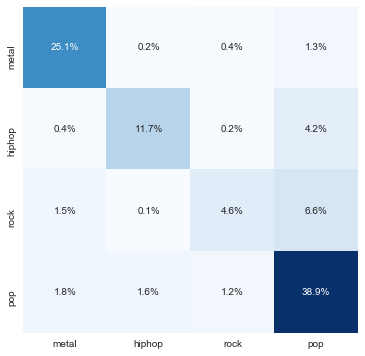

In [53]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(6, 6))
cnf_matrix = confusion_matrix(y_test, text_classifier_pred) / len(text_classifier_pred)

#Guardamos las etiquetas
target_labels = df_lyrics['Genre'].unique()

#Implementamos mapa de calor
sns.heatmap(cnf_matrix, xticklabels=target_labels, yticklabels=target_labels,
            #Formato en porcentaje
            annot=True, fmt=".1%",
            #Quitmaos la barra y cambiamos el color
            cbar=False, cmap="Blues"
            );

De acuerdo al __classification_report__ nuestro modelo se comporta peor para identificar a las canciones con letra pop, ya que no llega ni a un 50%, si bien podemos tomar un benchmark del 25% (cantidad de clases: 4) de igual manera el modelo no es para nada confiable. Tanto así que a __N'Sync__ no lo clasifica dentro del género pop.

### Desafío 5: Mejora del Modelo
* Proponga una estrategia para mejorar el desempeño del modelo en la categoría con peores
métricas.
* Repita los pasos de entrenamiento y reporte de métricas, esta vez incluyendo los nuevos
datos suministrados.
* Comente sobre el desempeño general de éste

Para mejorar el modelo en cuanto a la predicción del género __Pop__ agregaremos un dataset más, con la esperanza de que se comporte mejor.

In [57]:
file_list2 = glob.glob(os.getcwd() + '/dump_plus_pop/*.csv')
append_csv2 = []

for f in file_list_pop:
    append_csv2.append(pd.read_csv(f, index_col=None, header=0).drop(columns=['Unnamed: 0']))

df_lyrics2 = pd.concat(append_csv2)
df_lyrics2.columns = ['Artist', 'Genre', 'Song', 'Lyrics']
df_lyrics2.head()

,Artist,Genre,Song,Lyrics
0,Anthrax,metal,Deathrider,"Riding hard, high in the saddle \n Winged stee..."
1,Anthrax,metal,Metal Thrashing Mad,Racing down the road \n In a street machine of...
2,Anthrax,metal,I'm Eighteen,Lines form on my face and hands \n Lines form ...
3,Anthrax,metal,Panic,Move it to the front \n Reaching for the light...
4,Anthrax,metal,Subjugator,Out in the streets \n We're fighting tonight \...


Text(0.5, 1.0, 'Ordenado por Género')

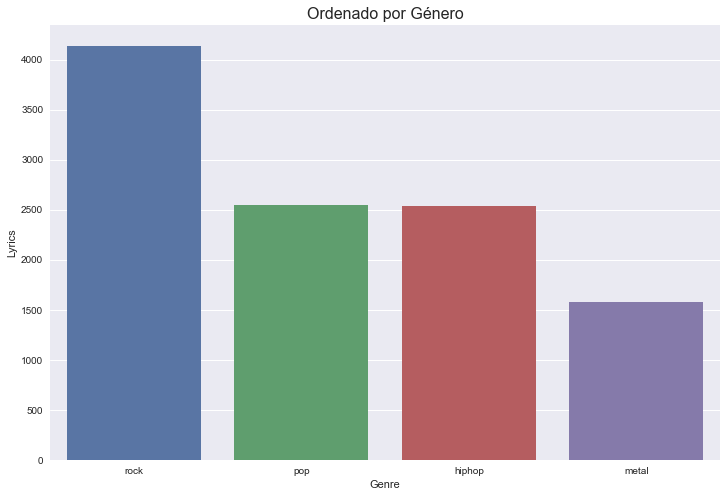

In [70]:
plt.figure(figsize=(12, 8))
df_genre2 = df_lyrics2.groupby('Genre').count().reset_index()
df_genre2.sort_values(by='Lyrics', ascending=False, inplace=True)
sns.barplot(x='Genre', y='Lyrics', data=df_genre2)
plt.title("Ordenado por Género", size=16)

In [85]:
X = df_lyrics2['Lyrics']
Y = df_lyrics2['Genre']

#Creo las matrices de entrenamiento y validación
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.40, random_state=11238)

text_classifier2 = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('classifier', MultinomialNB())
])

text_classifier2.fit(X_train2, y_train2)

Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [86]:
text_classifier_pred2 = text_classifier2.predict(X_test2)

In [87]:
print(classification_report(y_test2, text_classifier_pred2))

              precision    recall  f1-score   support

      hiphop       0.85      0.90      0.88      1043
       metal       0.83      0.70      0.76       608
         pop       0.68      0.69      0.68      1028
        rock       0.76      0.76      0.76      1643

   micro avg       0.77      0.77      0.77      4322
   macro avg       0.78      0.76      0.77      4322
weighted avg       0.77      0.77      0.77      4322



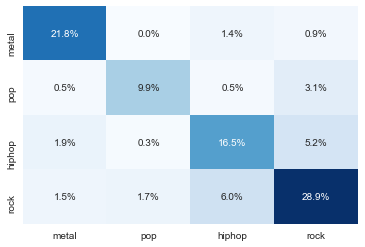

In [88]:
cnf_matrix2 = confusion_matrix(y_test2, text_classifier_pred2) / len(y_test2)

target_labels2 = df_lyrics2['Genre'].unique()

sns.heatmap(cnf_matrix2, xticklabels=target_labels2, yticklabels=target_labels2,
            #Se genera los porcentajes en la matriz
            annot=True, fmt=".1%",
            #Quitamos la barra
            cbar=False, cmap="Blues")

Observando el __classification_report__ nuestro modelo ha mejorado con la adición de nueva data para el género pop con 68% un 20% más en comparación con el anterior.

In [89]:
text_classifier2.predict(text_predict)

array(['rock', 'metal', 'pop', 'pop', 'rock'], dtype='<U6')

En esta ocasión el modelo ha identificado mejor a las letras que son de género pop, tanto así que a __N'Sync__ ya lo reconoce.